In [1]:
import cartopy.crs as ccrs
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np

In [2]:
HEM = 'sh'

In [3]:
fnam = '/home/jbassham/jack/thesis-rough/data/lr-input/sh/20260116_164705/test_sh19922020_20260116_164705.npz'

data = np.load(fnam)
y_test = data['y_test']

u_true = y_test[:,0,:,:]
v_true = y_test[:,1,:,:]

ri_t0 = data['r_test']

x_test = data['x_test']

ua_t0 = x_test[:,0,:,:]
ua_t0 = x_test[:,1,:,:]
ci_t1 = x_test[:,2,:,:]




In [4]:
np.shape(u_true)

(731, 81, 522)

In [5]:
fnam = '/home/jbassham/jack/thesis-rough/data/regrid/sh/20260107_164301/motion_ppv4_latlon_sh19922020_20260107_164301.npz'

data = np.load(fnam)

# Import the last 731 days of r_raw (match test indices)
r_raw = data['r'][-731:,:,:]

np.shape(r_raw)

(731, 81, 522)

In [6]:
fnam = '/home/jbassham/jack/thesis-rough/data/regrid/sh/20260107_164301/con_nimbus7_latlon_sh19922020_20260107_164301.npz'

data = np.load(fnam)

# Import the last 731 days of raw concentration (match test indices, present day)
ci_raw_t0 = data['ci'][-731:,:,:]

In [7]:
fnam = '/home/jbassham/jack/thesis-rough/data/coordinates/sh/20260107_164301/coord_sh19922020_20260107_164301.npz'

data = np.load(fnam)
lat = data['lat']
lon = data['lon']

In [8]:

def vartrue(true):

    truebar = np.nanmean(true, axis = 0)

    vartrue = np.nanmean((true - truebar) ** 2, axis = 0)

    return vartrue


In [9]:
vartrue_u = vartrue(u_true)
vartrue_v = vartrue(v_true)

/tmp/ipykernel_599237/3876742941.py:3: RuntimeWarning: Mean of empty slice
  truebar = np.nanmean(true, axis = 0)
/tmp/ipykernel_599237/3876742941.py:5: RuntimeWarning: Mean of empty slice
  vartrue = np.nanmean((true - truebar) ** 2, axis = 0)


In [10]:
def plot_metric(u_data, v_data, lon, lat, metric):

    # Set longitude bounds for plot (full zonal coverage)
    lon_min = -180
    lon_max = 180

    # Set latitude bounds based on hemisphere
    if HEM == 'sh':
        lat_min = -90
        lat_max = -65
    elif HEM =='nh':
        lat_min = 65
        lat_max = 90

    # Define plot proection based on hempisphere
    if HEM == 'sh':
        projection = ccrs.SouthPolarStereo()
    elif HEM == 'nh':
        projection = ccrs.NorthPolarStereo()

    # Define data-to-plot's coordinate reference system
    # NOTE, used for 'crs' and 'transform' cartopy parameters
    crs = ccrs.PlateCarree()

    # Set color map
    cmap = cmo.cm.matter_r  # red blue colormap from cmocean

    # Saturate colormap to show small values
    vmin = 0
    vmax = 0.05
    
    # Initialize subplots
    fig, axs = plt.subplots(
        nrows = 1,
        ncols = 2,
        figsize = (6,3),
        subplot_kw = {'projection': projection},
        constrained_layout = True
    )

    # Plot left plot; zonal evaluation
    axs[0].set_extent([lon_min, lon_max, lat_min, lat_max], crs = crs)
    axs[0].coastlines
    # Plot pcolormesh plot
    pcm_0 = axs[0].pcolormesh(
        lon, lat, u_data,
        transform = crs,
        cmap = cmap, 
        vmin = vmin, vmax = vmax
    )
    axs[0].set_title("zonal")
    # Add colorbar
    plt.colorbar(pcm_0, ax = axs[0], orientation = 'vertical')

    # Plot right plot; meridional evaluation
    axs[1].set_extent([lon_min, lon_max, lat_min, lat_max], crs = crs)
    axs[1].coastlines
    # Plot pcolormesh plot
    pcm_1 = axs[1].pcolormesh(
        lon, lat, v_data,
        transform = crs,
        cmap = cmap, 
        vmin = vmin, vmax = vmax
    )
    axs[1].set_title("meridional")
    # Add colorbar
    plt.colorbar(pcm_1, ax = axs[1], orientation = 'vertical')

    # Add title to plot
    fig.suptitle(f"{metric}", fontweight = 'bold')

    # Format with tight layout
    fig.tight_layout

    # Add text with means
    fig.text(0, -0.05, f"mean zonal {metric}: {np.nanmean(u_data):.4f}")
    fig.text(0.5, -0.05, f"mean meridional {metric}: {np.nanmean(v_data):.4f}")

    # # Define filemane for figure
    # fnam = f"{metric}_{MODEL_STR}_{TIMESTAMP_MODEL}.png"

    # # Save figure
    # plt.savefig(os.path.join(PATH_DEST, fnam), bbox_inches = 'tight')

    return

In [11]:
def plot_metric2(u_data, v_data, lon, lat, metric):

    # Set longitude bounds for plot (full zonal coverage)
    lon_min = -180
    lon_max = 180

    # Set latitude bounds based on hemisphere
    if HEM == 'sh':
        lat_min = -90
        lat_max = -65
    elif HEM =='nh':
        lat_min = 65
        lat_max = 90

    # Define plot proection based on hempisphere
    if HEM == 'sh':
        projection = ccrs.SouthPolarStereo()
    elif HEM == 'nh':
        projection = ccrs.NorthPolarStereo()

    # Define data-to-plot's coordinate reference system
    # NOTE, used for 'crs' and 'transform' cartopy parameters
    crs = ccrs.PlateCarree()

    # Set color map
    cmap = cmo.cm.thermal  # red blue colormap from cmocean

    # Saturate colormap to show small values
    vmin = 10
    vmax = 0.05
    
    # Initialize subplots
    fig, axs = plt.subplots(
        nrows = 1,
        ncols = 2,
        figsize = (6,3),
        subplot_kw = {'projection': projection},
        constrained_layout = True
    )

    # Plot left plot; zonal evaluation
    axs[0].set_extent([lon_min, lon_max, lat_min, lat_max], crs = crs)
    axs[0].coastlines
    # Plot pcolormesh plot
    pcm_0 = axs[0].pcolormesh(
        lon, lat, u_data,
        transform = crs,
        cmap = cmap, 
        # vmin = vmin, 
        # vmax = vmax
    )
    # axs[0].set_title("zonal")
    # Add colorbar
    plt.colorbar(pcm_0, ax = axs[0], orientation = 'vertical')

    # Plot right plot; meridional evaluation
    axs[1].set_extent([lon_min, lon_max, lat_min, lat_max], crs = crs)
    axs[1].coastlines
    # Plot pcolormesh plot
    pcm_1 = axs[1].pcolormesh(
        lon, lat, v_data,
        transform = crs,
        cmap = cmap, 
        # vmin = vmin, 
        # vmax = vmax
    )
    # axs[1].set_title("meridional")
    # Add colorbar
    plt.colorbar(pcm_1, ax = axs[1], orientation = 'vertical')

    # Add title to plot
    fig.suptitle(f"{metric}", fontweight = 'bold')

    # Format with tight layout
    fig.tight_layout

    # Add text with means
    fig.text(0, -0.05, f"mean zonal {metric}: {np.nanmean(u_data):.4f}")
    fig.text(0.5, -0.05, f"mean meridional {metric}: {np.nanmean(v_data):.4f}")

    # # Define filemane for figure
    # fnam = f"{metric}_{MODEL_STR}_{TIMESTAMP_MODEL}.png"

    # # Save figure
    # plt.savefig(os.path.join(PATH_DEST, fnam), bbox_inches = 'tight')

    return

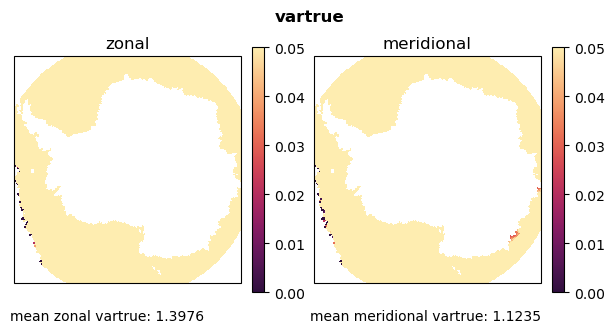

In [12]:
plot_metric(vartrue_u, vartrue_v, lon, lat, 'vartrue')

In [13]:
r_bar = np.nanmean(ri_t0, axis = 0)

/tmp/ipykernel_599237/1158221623.py:1: RuntimeWarning: Mean of empty slice
  r_bar = np.nanmean(ri_t0, axis = 0)


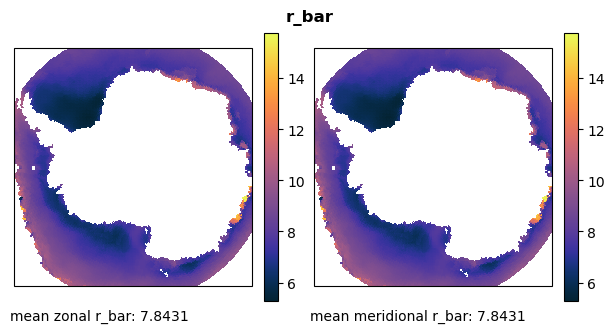

In [14]:
plot_metric2(r_bar, r_bar, lon, lat, 'r_bar')

In [15]:
r_raw_bar = np.nanmean(r_raw, axis = 0)

/tmp/ipykernel_599237/790590030.py:1: RuntimeWarning: Mean of empty slice
  r_raw_bar = np.nanmean(r_raw, axis = 0)


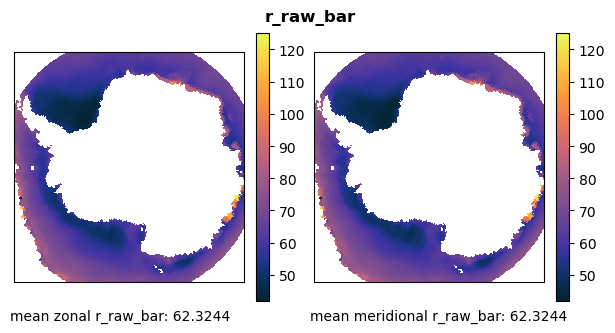

In [16]:
plot_metric2(r_raw_bar, r_raw_bar, lon, lat, 'r_raw_bar')

In [17]:
# Mask points where ci = 0 for > 20 days per year. (Or Percent?!)

# Count number of days with raw ice conentration equal to zero at each gridpoint
zero_days = np.sum(ci_raw_t0 == 0, axis = 0)


print(zero_days > 20)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


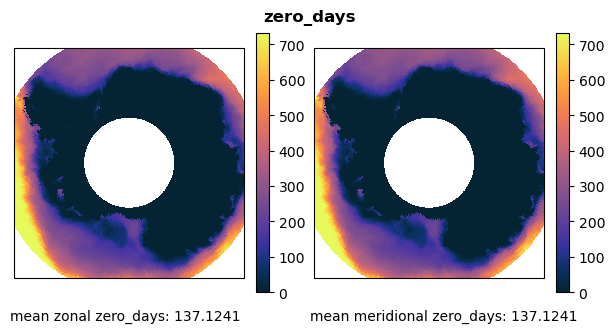

In [18]:
plot_metric2(zero_days, zero_days, lon, lat, 'zero_days')